# Creating a white image with black cross in the middle

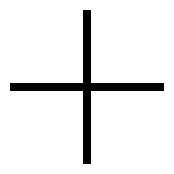

Image dimensions: height=21, width=21


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create white image
size = 21
img = np.full((size, size), 255, dtype=np.uint8)

# Draw black cross (center row and column)
c = size // 2
img[c, :] = 0
img[:, c] = 0

# Show image
plt.figure(figsize=(2,2))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# dimension of image
height, width = img.shape
print(f"Image dimensions: height={height}, width={width}")

# Creating a Kernel as Binomial Filter

In [3]:
# Creating a Kernel as Binomial Filter
kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]] ,np.float32 )
kernel /= sum(kernel[0,:])**2
print(kernel)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


# Welche Auswirkung haben  die Werte in der Matrix des Kernels?

Die Werte im Kernel sind Gewichte für die Nachbarpixel beim Falten (filter2D). Kurz:

- Größere Werte verstärken den Beitrag dieses Nachbarpixels zum Ergebnis.
- Der zentrale Wert steuert, wie stark der Originalpixel gegenüber seinen Nachbarn erhalten bleibt.
- Symmetrische Werte (wie 1 2 1 / 2 4 2 / 1 2 1) führen zu gleichmäßiger, richtungsunabhängiger Glättung (Gaussian-ähnlich). 
    - Symmetrische Werte im Kernel bedeuten, dass alle Richtungen (oben, unten, links, rechts, diagonal) gleich behandelt werden. Dadurch wird das Bild überall gleichmäßig geglättet, ohne eine Richtung zu bevorzugen. Das Ergebnis ist eine isotrope (richtungsunabhängige) Glättung – wie bei einem Gauß-Filter. 
- Die Normalisierung durch kernel /= (1+2+1)**2 sorgt dafür, dass die Summe aller Gewichte = 1 ist; dadurch bleibt die Helligkeit insgesamt erhalten.



- Erhöht man die Randwerte relativ zum Zentrum, wird das Bild stärker verwischt.
- Setzt man negative und positive Werte (z.B. [-1 0 1]-Muster), erhält man Kantendetektion statt Glättung.
- Ein sehr großer Mittelwert und kleine Randwerte reduzieren den Einfluss der Umgebung (weniger Glättung).
- Gleichverteilte Werte (alles = 1, dann normalisiert) ergeben einfachen Durchschnitt (Box Blur).

In deinem Kernel: Zentrum (4/16) ≈ 0.25, Kanten (2/16) = 0.125, Ecken (1/16) = 0.0625. Zentrum zählt am meisten, Ecken am wenigsten → weiche, isotrope Glättung. GitHub Copilot

# Using Kernel as a Filter

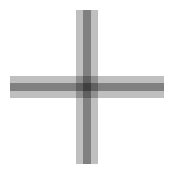

Image dimensions: height=21, width=21


In [4]:
# Using Kernel as a Filter

import cv2

res = cv2.filter2D(img, ddepth=-1, kernel=kernel)
plt.figure(figsize=(2,2))
plt.imshow(res, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# dimension of image
height, width = res.shape
print(f"Image dimensions: height={height}, width={width}")

# Using different types of borderType

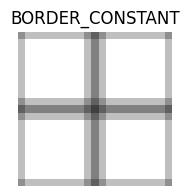

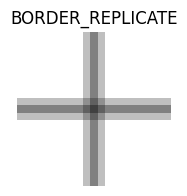

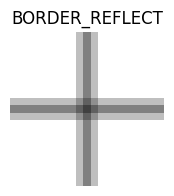

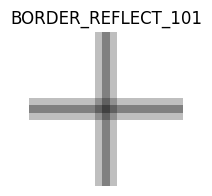

In [5]:
# Using different types of borderType
border_types = {
    'BORDER_CONSTANT': cv2.BORDER_CONSTANT, # default value is 0
    'BORDER_REPLICATE': cv2.BORDER_REPLICATE, # repeat edge pixels
    'BORDER_REFLECT': cv2.BORDER_REFLECT, # mirror image without repeating edge pixels
    'BORDER_REFLECT_101': cv2.BORDER_REFLECT_101 # mirror image with repeating edge pixels
    # 'BORDER_WRAP': cv2.BORDER_WRAP  # not supported by filter2D (assertion fails)
}

# for each supported border type, apply filter and show result
for name, btype in border_types.items():
    res = cv2.filter2D(img, ddepth=-1, kernel=kernel, borderType=btype)
    plt.figure(figsize=(2,2))
    plt.title(name)
    plt.imshow(res, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()

# Using 5x5 Binominal Filter

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


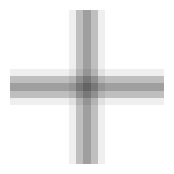

Image dimensions: height=21, width=21


In [6]:
# Using 5x5 Binominal Filter

kernel_5x5 = np.array([[1, 4, 6, 4, 1],
                       [4,16,24,16, 4],
                       [6,24,36,24, 6],
                       [4,16,24,16, 4],
                       [1, 4, 6, 4, 1]], np.float32)
kernel_5x5 /= np.sum(kernel_5x5)
print(kernel_5x5)

res_5x5 = cv2.filter2D(img, ddepth=-1, kernel=kernel_5x5)
plt.figure(figsize=(2,2))
plt.imshow(res_5x5, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# dimension of image
height, width = res_5x5.shape
print(f"Image dimensions: height={height}, width={width}")


# Using Kernel as a Mean Filter

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


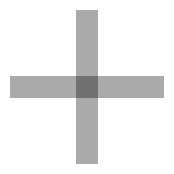

Image dimensions: height=21, width=21


In [7]:
# Using Kernel as a Mean Filter

kernel = np.ones((3,3), np.float32)
kernel /= 9.0
print(kernel)

res = cv2.filter2D(img, ddepth=-1, kernel=kernel)
plt.figure(figsize=(2,2))
plt.imshow(res, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# dimension of image
height, width = res.shape
print(f"Image dimensions: height={height}, width={width}")


# Using Kernel as a Gauss Mask

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


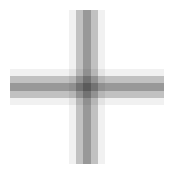

Image dimensions: height=21, width=21


In [8]:
# Using Kernel as a Gauss Mask
k = 5  # kernel size
sigma = 1.0

ax = np.arange(-(k//2), k//2+1)
xx, yy = np.meshgrid(ax, ax)

kernel = np.exp(-(xx**2 + yy**2) / (2.0 * sigma**2))
kernel /= np.sum(kernel)

print(kernel)

res = cv2.filter2D(img, ddepth=-1, kernel=kernel)
plt.figure(figsize=(2,2))
plt.imshow(res, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# dimension of image
height, width = res.shape
print(f"Image dimensions: height={height}, width={width}")


# Kantendetektoren mit Sobel

Kernel X:
 [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
Kernel Y:
 [[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]


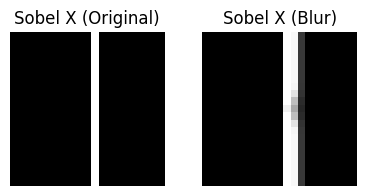

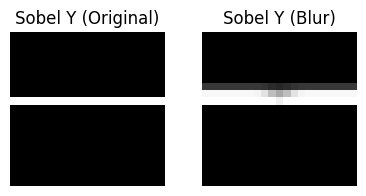

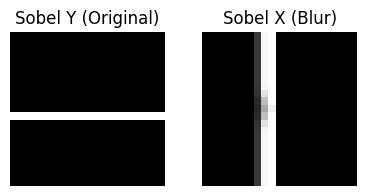

In [19]:
# Kantendetektoren mit Sobel

kernel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]], np.float32)

kernel_y = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]], np.float32)

print("Kernel X:\n", kernel_x)
print("Kernel Y:\n", kernel_y)

# Original und bereits geglättetes Bild (res stammt aus vorheriger Filterung)
img_orig = img
img_blur = res  # falls du einen anderen Filter nutzen willst, entsprechend anpassen

# Sobel X auf Original vs. Blur
res_x_img  = cv2.filter2D(img_orig, ddepth=-1, kernel=kernel_x)
res_x_blur = cv2.filter2D(img_blur, ddepth=-1, kernel=kernel_x)

fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(res_x_img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Sobel X (Original)")
axes[0].axis('off')
axes[1].imshow(res_x_blur, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Sobel X (Blur)")
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Sobel Y auf Original vs. Blur
res_y_img  = cv2.filter2D(img_orig, ddepth=-1, kernel=kernel_y)
res_y_blur = cv2.filter2D(img_blur, ddepth=-1, kernel=kernel_y)

fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(res_y_img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Sobel Y (Original)")
axes[0].axis('off')
axes[1].imshow(res_y_blur, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Sobel Y (Blur)")
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Tauschen der Filter Richtung
res_xy_img  = cv2.filter2D(img_orig, ddepth=-1, kernel=-kernel_y)
res_xy_blur = cv2.filter2D(img_blur, ddepth=-1, kernel=-kernel_x)
fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(res_xy_img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Sobel Y (Original)")
axes[0].axis('off')
axes[1].imshow(res_xy_blur, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Sobel X (Blur)")
axes[1].axis('off')
plt.tight_layout()
plt.show()

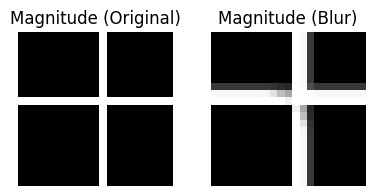

In [10]:
# Magnitude zweier Sobelmasken

magnitude_img = np.sqrt(np.square(res_x_img.astype(np.float32)) + np.square(res_y_img.astype(np.float32)))
magnitude_blur = np.sqrt(np.square(res_x_blur.astype(np.float32)) + np.square(res_y_blur.astype(np.float32)))
fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(magnitude_img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Magnitude (Original)")
axes[0].axis('off')
axes[1].imshow(magnitude_blur, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Magnitude (Blur)")
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Sobelmaske mit echtem Bild

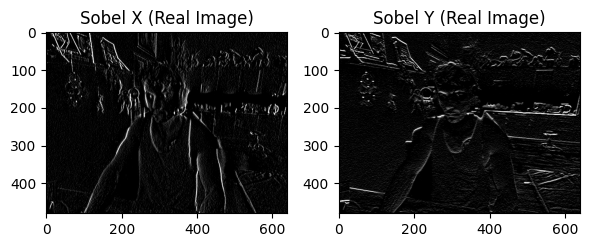

In [11]:
# Sobelmaske mit echtem Bild
img_real = cv2.imread('C:\\Users\\adrianishak.duda\\OneDrive - Hexagon\\Documents\\Experiment\\Python\\ComputerVision\\camera_image.jpg', cv2.IMREAD_GRAYSCALE)

kernel_sobel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

kernel_sobel_y = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

res_real_x = cv2.filter2D(img_real, ddepth=-1, kernel=kernel_sobel_x)
res_real_y = cv2.filter2D(img_real, ddepth=-1, kernel=kernel_sobel_y)

fig, axes = plt.subplots(1, 2, figsize=(6,3))
axes[0].imshow(res_real_x, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Sobel X (Real Image)")
axes[1].imshow(res_real_y, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Sobel Y (Real Image)")
plt.tight_layout()
plt.show()

# Magnitude der Sobelmasken
Die Magnitude ist die Laenge des Gradientenvektors. Das Bild wird einmal in x- und einmal in y-Richtung gefiltert. Anschliessend wird die Magnitude berechnen $$\text{mag}=\sqrt{G_x^2+G_y^2}\quad\text{(oder grob }|G_x|+|G_y|\text{).}$$

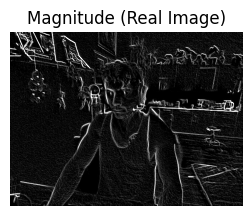

In [12]:
# Magnitude
magnitude_real = np.sqrt(np.square(res_real_x.astype(np.float32)) + np.square(res_real_y.astype(np.float32)))
plt.figure(figsize=(3,3))
plt.imshow(magnitude_real, cmap='gray', vmin=0, vmax=255)
plt.title("Magnitude (Real Image)")
plt.axis('off')
plt.show()

# Verschiebung des Wertebereichs

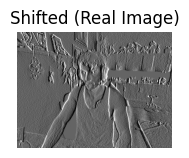

In [13]:
# Verschiebung des Wertebereichs
res_shifted = cv2.filter2D(img_real, ddepth=-1, kernel=kernel_sobel_x, delta=100)
plt.figure(figsize=(2,2))
plt.imshow(res_shifted, cmap='gray', vmin=0, vmax=255)
plt.title("Shifted (Real Image)")
plt.axis('off')
plt.show()


# in Real time via camera capture

In [14]:
# in Real time via camera capture
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    sobel_x = cv2.filter2D(gray, ddepth=-1, kernel=kernel_sobel_x, delta=100)
    sobel_y = cv2.filter2D(gray, ddepth=-1, kernel=kernel_sobel_y, delta=100)
    magnitude = np.sqrt(np.square(sobel_x.astype(np.float32)) + np.square(sobel_y.astype(np.float32)))
    magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)

    cv2.imshow('Sobel Magnitude', magnitude)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Kantendetektoren mit Prewitt

Kernel X:
 [[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
Kernel Y:
 [[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]


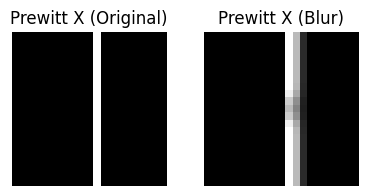

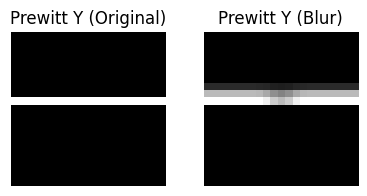

In [15]:
# Kantendetektoren mit Prewitt

kernel_x = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]], np.float32)

kernel_y = np.array([[ 1,  1,  1],
                    [ 0,  0,  0],
                    [-1, -1, -1]], np.float32)

print("Kernel X:\n", kernel_x)
print("Kernel Y:\n", kernel_y)

# Original und bereits geglättetes Bild (res stammt aus vorheriger Filterung)
img_orig = img
img_blur = res  # falls du einen anderen Filter nutzen willst, entsprechend anpassen

# Prewitt X auf Original vs. Blur
res_x_img  = cv2.filter2D(img_orig, ddepth=-1, kernel=kernel_x)
res_x_blur = cv2.filter2D(img_blur, ddepth=-1, kernel=kernel_x)

fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(res_x_img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Prewitt X (Original)")
axes[0].axis('off')
axes[1].imshow(res_x_blur, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Prewitt X (Blur)")
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Prewitt Y auf Original vs. Blur
res_y_img  = cv2.filter2D(img_orig, ddepth=-1, kernel=kernel_y)
res_y_blur = cv2.filter2D(img_blur, ddepth=-1, kernel=kernel_y)

fig, axes = plt.subplots(1, 2, figsize=(4,2))
axes[0].imshow(res_y_img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Prewitt Y (Original)")
axes[0].axis('off')
axes[1].imshow(res_y_blur, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Prewitt Y (Blur)")
axes[1].axis('off')
plt.tight_layout()
plt.show()

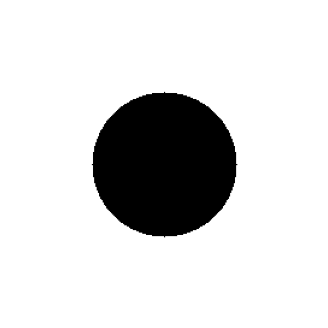

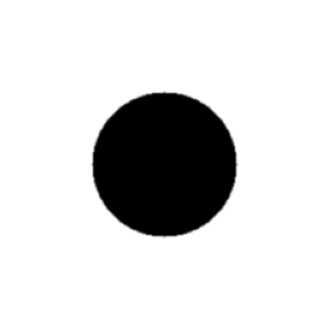

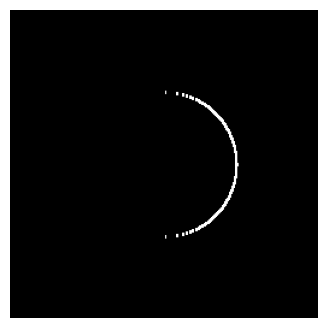

In [16]:
 # Erzeuge ein weisses Bild eines schwarzen Kreisen und lass die verschiednen Filter darauf wirken

size = 256
imgCircle = np.full((size, size), 255, dtype=np.uint8)
cv2.circle(imgCircle, center=(size//2, size//2), radius=60, color=0, thickness=-1)
plt.figure(figsize=(4,4))
plt.imshow(imgCircle, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# binomial filter kernel
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]] ,np.float32 )
kernel /= sum(kernel[0,:])**2
resCircle = cv2.filter2D(imgCircle, ddepth=-1, kernel=kernel)
plt.figure(figsize=(4,4))
plt.imshow(resCircle, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# sobel filter kernel
kernel_sobel = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], np.float32)

resCircle = cv2.filter2D(imgCircle, ddepth=-1, kernel=kernel_sobel)
plt.figure(figsize=(4,4))
plt.imshow(resCircle, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()


# Kantenorientierung visualisieren des Kreises durch Normalenvektoren
Die Gradientenrichtung zeigt die Richtung des staerksten Helligkeitsanstiegs und wird bestimmt durch $$\theta=\operatorname{atan2}(G_y,\,G_x)$$

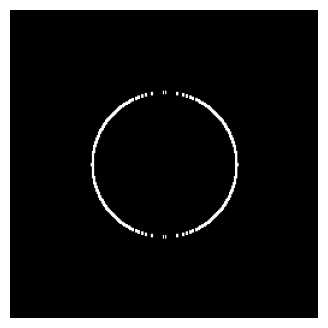

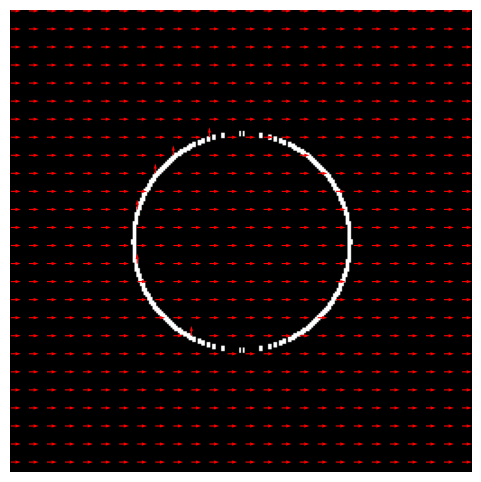

In [17]:
# Kantenorientierung visualisieren des Kreises durch Normalenvektoren
sobel_x = cv2.filter2D(imgCircle, ddepth=-1, kernel=kernel_sobel)
sobel_y = cv2.filter2D(imgCircle, ddepth=-1, kernel=np.flipud(np.fliplr(kernel_sobel)))
magnitude = np.sqrt(np.square(sobel_x.astype(np.float32)) + np.square(sobel_y.astype(np.float32)))
orientation = np.arctan2(sobel_y, sobel_x)  # Winkel in Bogenmaß
plt.figure(figsize=(4,4))
plt.imshow(magnitude, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# Quiver Plot
step = 10  # Abstand zwischen den Vektoren
Y, X = np.mgrid[0:size:step, 0:size:step]
U = np.cos(orientation[::step, ::step]) 
V = np.sin(orientation[::step, ::step])
plt.figure(figsize=(6,6))
plt.imshow(magnitude, cmap='gray', vmin=0, vmax=255)
plt.quiver(X, Y, U, V, color='red')
plt.axis('off')
plt.show()